# EDA

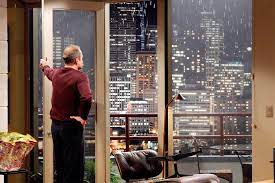

In [40]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import airportsdata as airports

import airportsdata
airports = airportsdata.load()  # key is ICAO code, the default
print(airports['KJFK'])


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

{'icao': 'KJFK', 'iata': 'JFK', 'name': 'John F Kennedy International Airport', 'city': 'New York', 'subd': 'New York', 'country': 'US', 'elevation': 13.0, 'lat': 40.63980103, 'lon': -73.77890015, 'tz': 'America/New_York'}


In [31]:
df = pd.read_csv('data/Train.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [37]:
df.sample(10)

df.STATUS.unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [25]:
df2 = df.DEPSTN
df2= df2.unique()
df2

array(['CMN', 'MXP', 'TUN', 'DJE', 'TLS', 'IST', 'ORY', 'MIR', 'BRU',
       'ABJ', 'VCE', 'AMS', 'FRA', 'BCN', 'JED', 'ALG', 'LIS', 'SXB',
       'LYS', 'OUA', 'LGW', 'BEY', 'NCE', 'OPO', 'MRS', 'DUS', 'SFA',
       'FCO', 'CDG', 'NKC', 'NTE', 'ZRH', 'GVA', 'OUD', 'MUC', 'SXF',
       'HAM', 'NDR', 'NBE', 'CAI', 'BEG', 'VIE', 'ORN', 'MAD', 'TOE',
       'BKO', 'DKR', 'KGL', 'BLQ', 'MLA', 'AHU', 'LHR', 'BOD', 'PRG',
       'LJU', 'SVO', 'MED', 'BUD', 'ARN', 'CPH', 'CRL', 'OST', 'TNG',
       'GAF', 'NAP', 'BRQ', 'OSR', 'YUL', 'NIM', 'TMR', 'JIB', 'CGN',
       'EBL', 'GAE', 'BJA', 'AYT', 'RAK', 'LFW', 'LIL', 'PMO', 'FBM',
       'TBJ', 'PSA', 'KRT', 'GNB', 'CZL', 'MVB', 'VNO', 'ESB', 'LBV',
       'CKY', 'LED', 'KSC', 'BTS', 'AMM', 'OTP', 'TRN', 'IEV', 'HBE',
       'CAG', 'KBP', 'ATH', 'SKG', 'ADB', 'DSS', 'DOH', 'COO', 'LUX',
       'FIH', 'BYJ', 'KEF', 'EBM', 'BDS', 'AAL', 'VKO', 'AAE', 'BRI',
       'VRN', 'SKX', 'HAJ', 'BLL', 'TLL', 'VOG', 'LAD', 'GHA', 'KTW',
       'SJJ', 'KRR',

In [26]:
df3 = df.ARRSTN
df3 = df3.unique()
df3

array(['TUN', 'IST', 'NTE', 'ALG', 'BCN', 'ORY', 'FCO', 'NCE', 'MRS',
       'MED', 'FRA', 'BRU', 'DJE', 'LYS', 'CMN', 'BEG', 'OUA', 'GVA',
       'MXP', 'BEY', 'MAD', 'JED', 'ABJ', 'VIE', 'MLA', 'BLQ', 'SFA',
       'LIS', 'LHR', 'CDG', 'MIR', 'CAI', 'DUS', 'HAM', 'NBE', 'ZRH',
       'AMS', 'NDR', 'TLS', 'VCE', 'SXB', 'MUC', 'LGW', 'CRL', 'ORN',
       'DKR', 'BOD', 'SXF', 'LJU', 'OST', 'NKC', 'BKO', 'TOE', 'AHU',
       'YUL', 'PRG', 'CPH', 'ARN', 'OUD', 'BRQ', 'GAF', 'JIB', 'BUD',
       'OPO', 'KGL', 'NIM', 'SVO', 'LIL', 'OSR', 'EBL', 'TNG', 'PSA',
       'CGN', 'AYT', 'GAE', 'NAP', 'BJA', 'KRT', 'LFW', 'TBJ', 'PMO',
       'TMR', 'FBM', 'RAK', 'GNB', 'ESB', 'CZL', 'LBV', 'KSC', 'CKY',
       'AMM', 'LED', 'BTS', 'MVB', 'HBE', 'OTP', 'CAG', 'VNO', 'TRN',
       'ATH', 'ADB', 'SKG', 'BYJ', 'DSS', 'COO', 'IEV', 'LUX', 'KBP',
       'DOH', 'FIH', 'EBM', 'BDS', 'VKO', 'AAE', 'BLL', 'HAJ', 'BRI',
       'CTA', 'VRN', 'SKX', 'VOG', 'BGY', 'LAD', 'KRR', 'SJJ', 'GHA',
       'RTM', 'TPS']

In [27]:
df2.shape

(132,)

In [28]:
df3.shape

(128,)

In [48]:
import airportsdata
airports = airportsdata.load('IATA')  # key is IATA code
print(airports['TPS'])

{'icao': 'LICT', 'iata': 'TPS', 'name': 'Trapani / Birgi Airport', 'city': 'Trapani', 'subd': 'Sicily', 'country': 'IT', 'elevation': 25.0, 'lat': 37.9113998413, 'lon': 12.4879999161, 'tz': 'Europe/Rome'}


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

# Import airport data
import airportsdata
airports = airportsdata.load()

# Import scripts
from optional.feature_engineering import *
from optional.prepare_flight_data import *

ModuleNotFoundError: No module named 'geopy'

In [54]:
# Customize color palette for presentation
colors_palette = ["#fa7256", "#f7d380","#ff4b41","#f89649","#f8b179"]

sns.set_palette(palette=colors_palette)

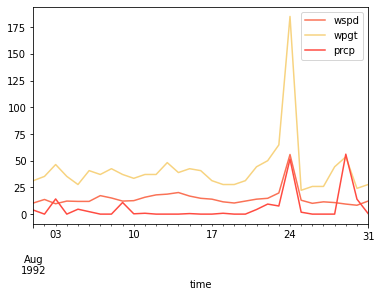

In [67]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Miami

# Set time period
start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
miami = Point(25.79319953918457, -80.29060363769531)

# Get daily data for 2018
data = Daily(miami, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

In [55]:
# Loading the data in and Shape to fit
airports = pd.DataFrame(airports).T.reset_index(drop=True)
# test data
train_df = pd.read_csv("data/Train.csv")
# train data
test_df = pd.read_csv("data/Test.csv")

# Print all of them for overview
print("==="*40)
print('\033[1m'+"Airport data"+ '\033[0m')
display(airports.head())
print()
print("==="*40)
print('\033[1m'+"Training data"+ '\033[0m')
display(train_df.head())
print()
print("==="*40)
print('\033[1m'+"Test data"+ '\033[0m')
display(test_df.head())

Airport data


,icao,iata,name,city,subd,country,elevation,lat,lon,tz
0,00AK,,Lowell Field,Anchor Point,Alaska,US,450.000,59.949,-151.696,America/Anchorage
1,00AL,,Epps Airpark,Harvest,Alabama,US,820.000,34.865,-86.770,America/Chicago
2,00AZ,,Cordes Airport,Cordes,Arizona,US,3810.000,34.306,-112.165,America/Phoenix
3,00CA,,Goldstone /Gts/ Airport,Barstow,California,US,3038.000,35.350,-116.888,America/Los_Angeles
4,00CO,,Cass Field,Briggsdale,Colorado,US,4830.000,40.622,-104.344,America/Denver



Training data


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.000
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.000
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.000
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.000
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.000



Test data


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [56]:
print(train_df["DATOP"].min())
print(train_df["DATOP"].max())

2016-01-01
2018-12-31


In [57]:
# Getting an idea of the dimension
print('Number of rows in the flightdata dataset : ',train_df.shape[0])
print('Number of columns in the flightdata dataset : ',train_df.shape[1])

Number of rows in the flightdata dataset :  107833
Number of columns in the flightdata dataset :  10


In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [59]:
# import from script files folder feature engineering script
missing_values_table(train_df)

NameError: name 'missing_values_table' is not defined

In [60]:
# All continuous variables
train_df.select_dtypes("object").columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC'],
      dtype='object')

In [61]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,107833.000,48.733,117.136,0.000,0.000,14.000,43.000,3451.000


In [62]:
train_df = fix_airport(train_df)
test_df = fix_airport(test_df)

NameError: name 'fix_airport' is not defined